# K-means clustering

### Sofía Dalia Magallón Páramo
### A01636714

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [64]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [65]:
# Dataset url
url = "datasets\SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [66]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [67]:
# get the number of observations and variables

df.shape

(1024, 6)

2. Drop rows with any missing values


In [68]:
# Drop rows with NaN values if existing
df = df.dropna()

# Print the new shape
df.shape


(1024, 6)

3. Scatterplot




<Axes: xlabel='x1', ylabel='x2'>

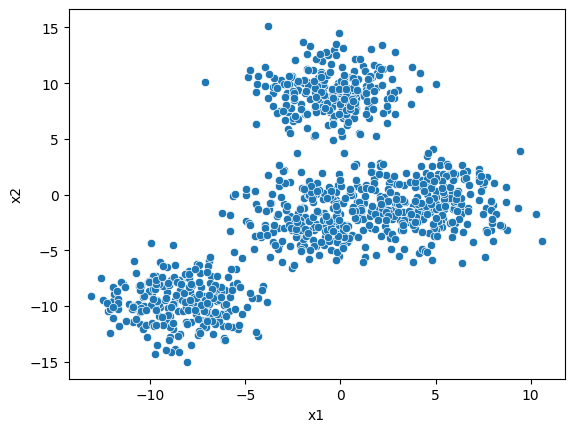

In [69]:
# Scatterplot of x1 and x2

sns.scatterplot(x="x1", y="x2", data=df)

<Axes: xlabel='x1', ylabel='x3'>

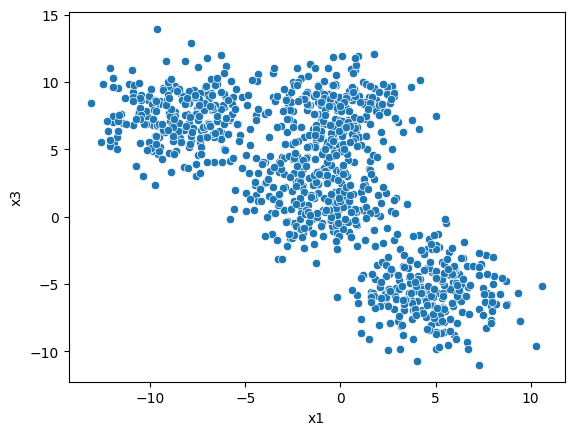

In [70]:
# Scatterplot of x1 and x3

sns.scatterplot(x="x1", y="x3", data=df)

Difficult to plot independetly all combinations, let's use pairplot

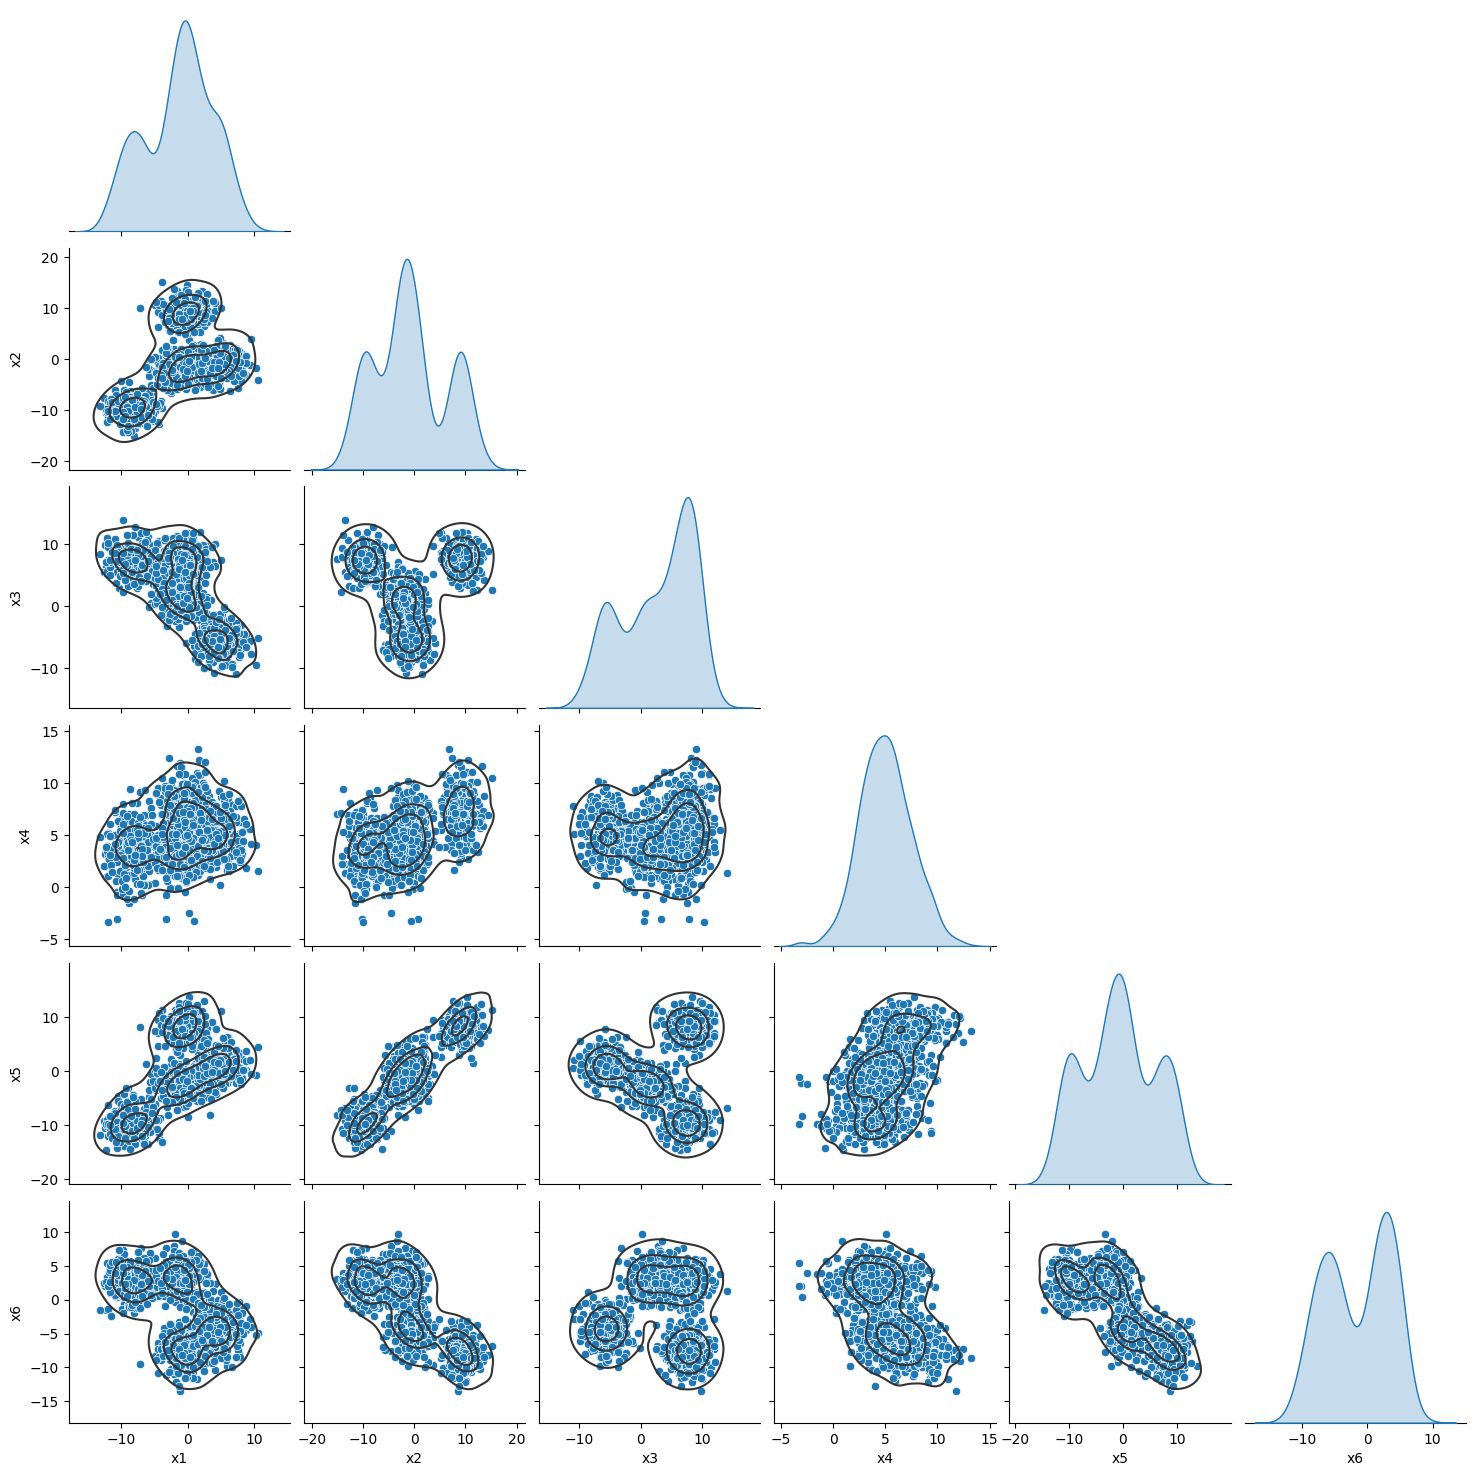

In [71]:
# Pairplot: Scatterplot of all variables

g = sns.pairplot(df, corner=True, diag_kind="kde")

g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [72]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Define number of clusters
K  =  4 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init='auto')

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset

yestimated

array([0, 1, 1, ..., 1, 3, 3])

In [73]:
# Add a new column to the dataset with the cluster information
df['yestimated'] = yestimated

df.drop(axis=1, index=6, inplace=True)

df.head()

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,0
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,1
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,1
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,1
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,3


In [82]:
# Label of the estimated clusters

df.yestimated.unique()

array([0, 1, 3, 2])

In [75]:
# Cluster centroides

centroids = km.cluster_centers_

centroids


array([[-1.11162986, -1.97482508,  1.3833106 ,  3.93069765, -2.6359108 ,
         3.22632658],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ],
       [-8.40571071, -9.65151928,  7.45044683,  3.77380481, -9.50855366,
         2.66099801],
       [ 4.75634768, -0.75290959, -5.5798822 ,  5.20729319,  1.024779  ,
        -4.30453201]])

In [85]:
# Sum of squared error (sse) of the final model

sse = km.inertia_

sse


20721.61963321039

In [77]:
# The number of iterations required to converge

n_iter = km.n_iter_

n_iter

3

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

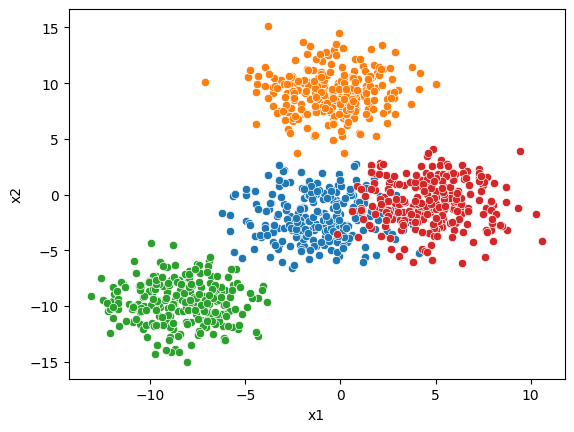

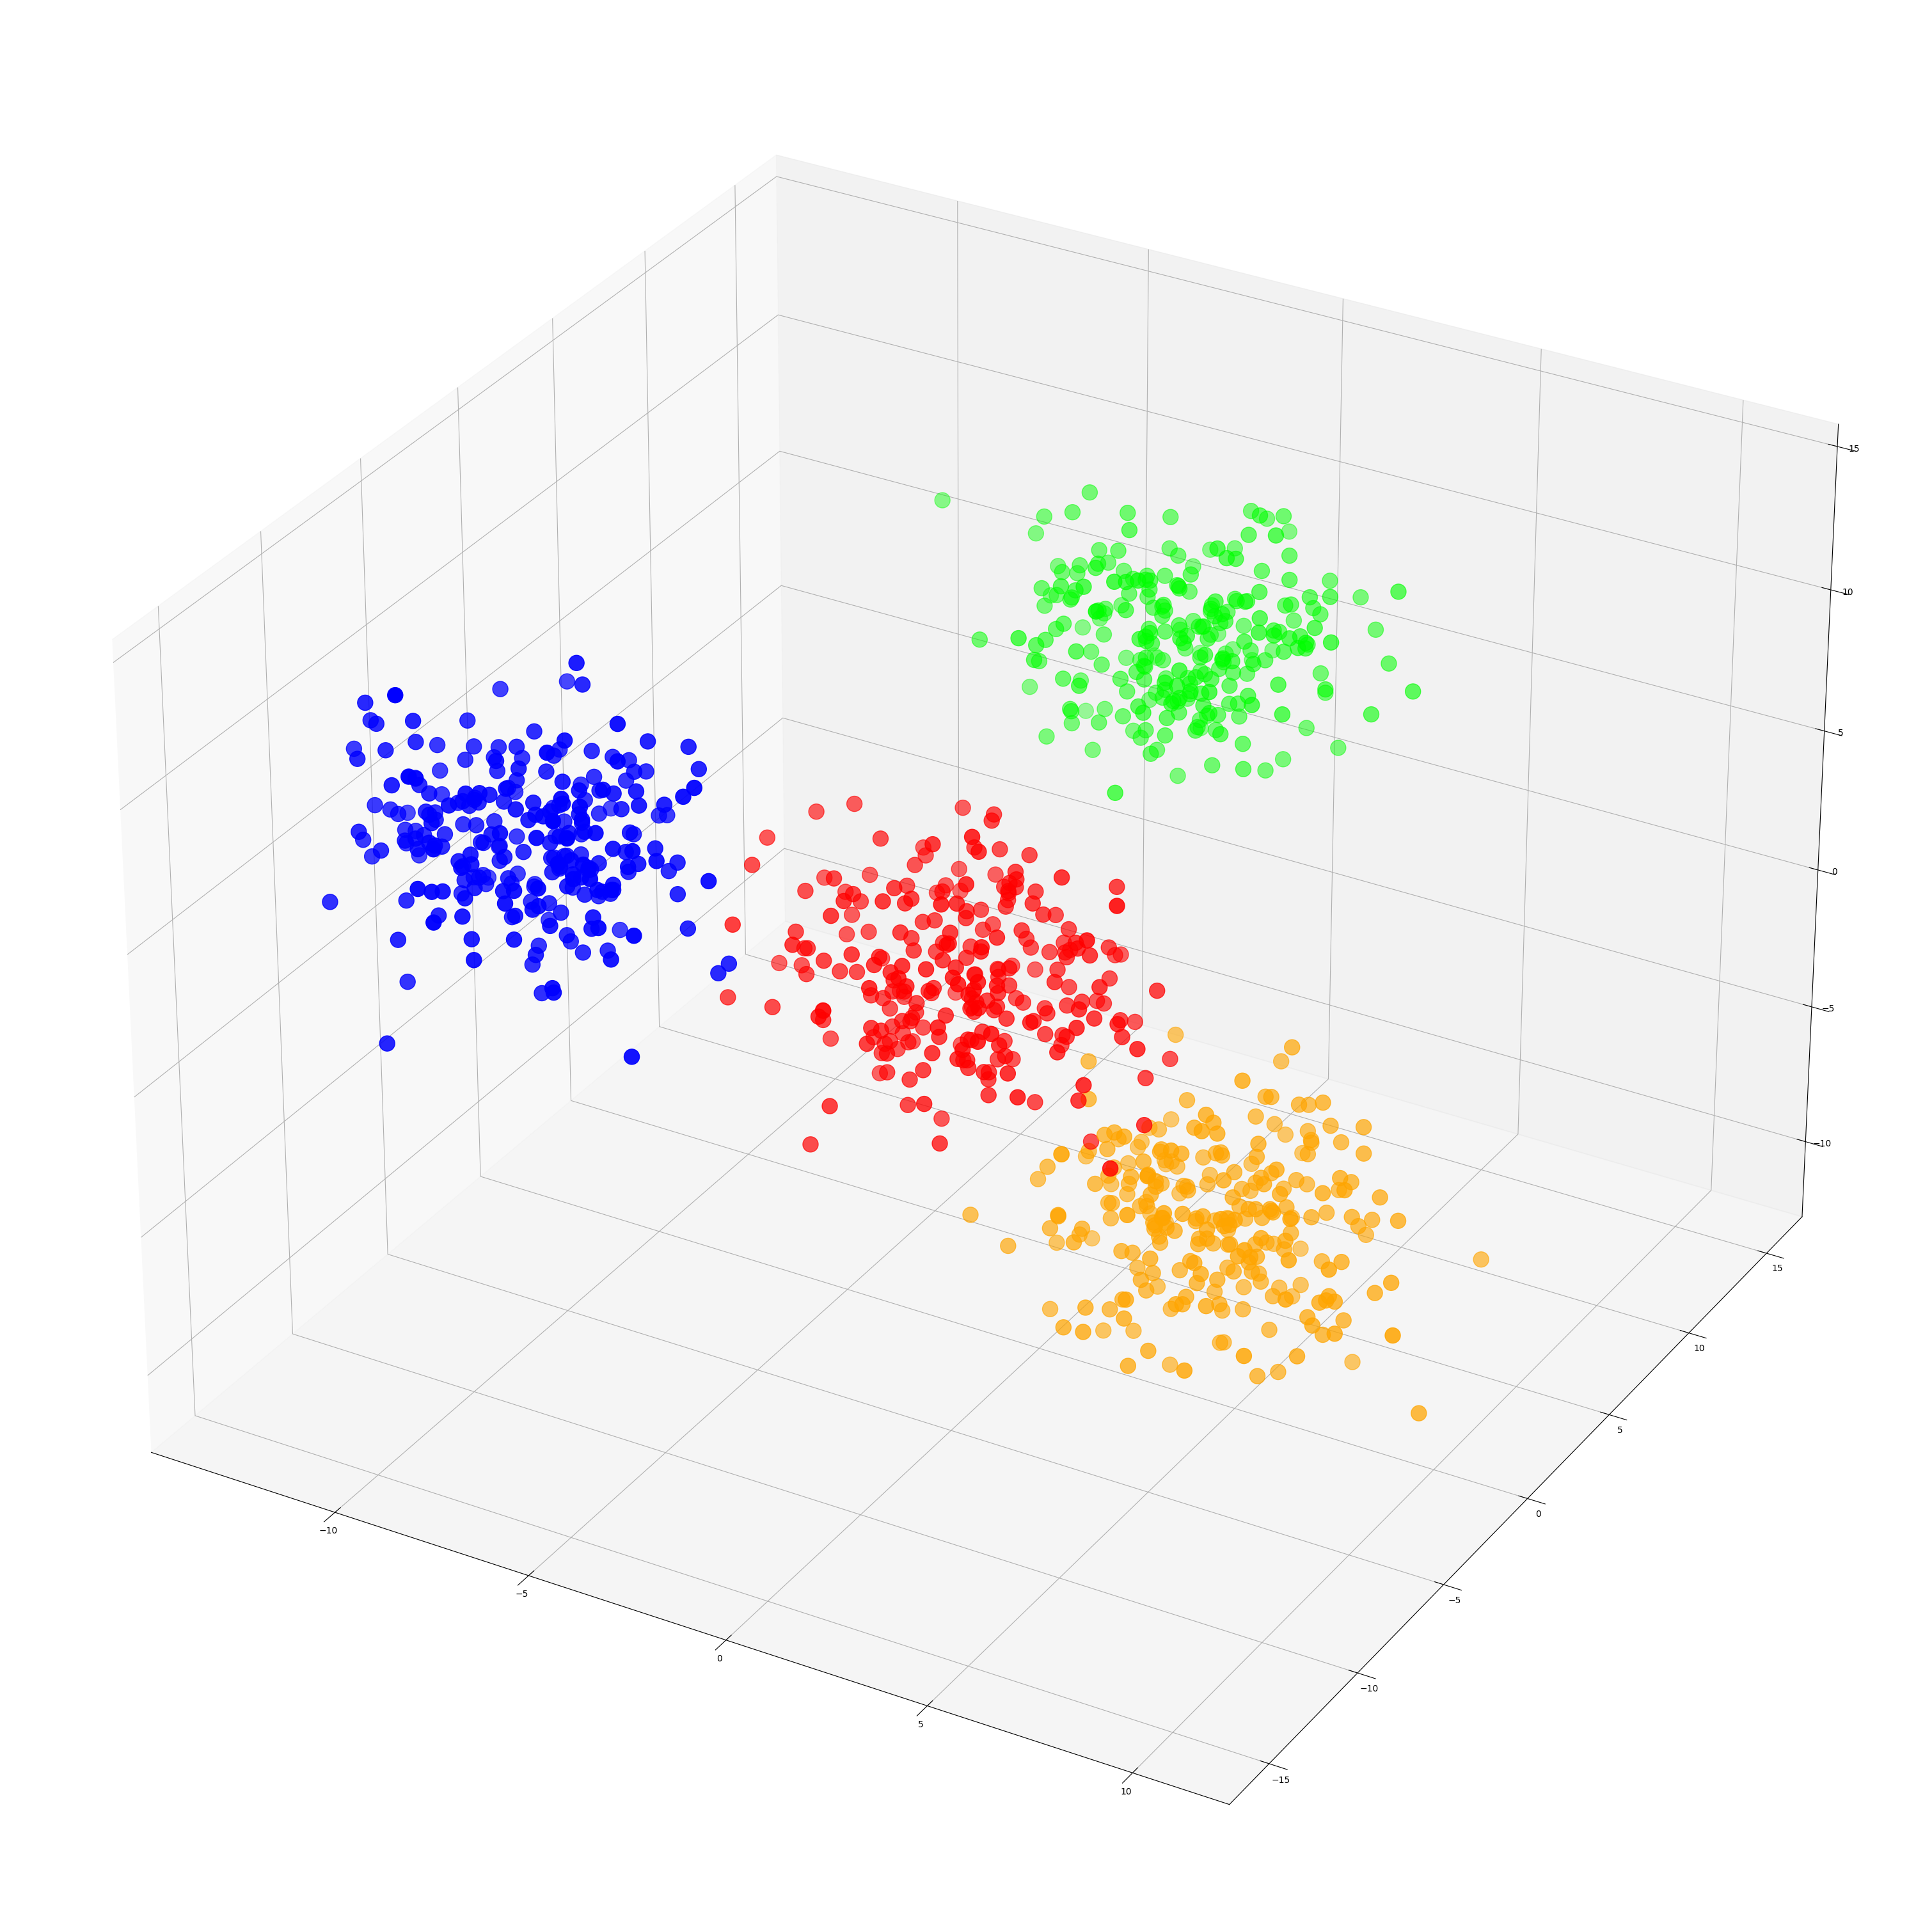

In [80]:
# Get a dataframe with the data of each clsuter

df_cluster0 = df[df['yestimated']==0]
df_cluster1 = df[df['yestimated']==1]
df_cluster2 = df[df['yestimated']==2]
df_cluster3 = df[df['yestimated']==3]


# Scatter plot of each cluster

sns.scatterplot(x="x1", y="x2", data=df_cluster0)
sns.scatterplot(x="x1", y="x2", data=df_cluster1)
sns.scatterplot(x="x1", y="x2", data=df_cluster2)
sns.scatterplot(x="x1", y="x2", data=df_cluster3)

fig = plt.figure(figsize=(30,30))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Red, Green, Blue, Orange
color_map = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFA500'])

sc = ax.scatter(df["x1"], df["x2"], df["x3"], c=df["yestimated"], s=300, cmap=color_map)


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [97]:
original_df = df.drop(axis=1, columns=['yestimated'])

In [98]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k

k_values = range(1, 10)

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(original_df)
    # Append the SSE to the list
    sse.append(km.inertia_)

sse


[187703.83808801067,
 104083.57636705665,
 44259.82055326151,
 24411.15576094452,
 23689.52554966267,
 22729.98108748708,
 22238.667059076583,
 21760.223670739873,
 20817.564445399486]

<Axes: >

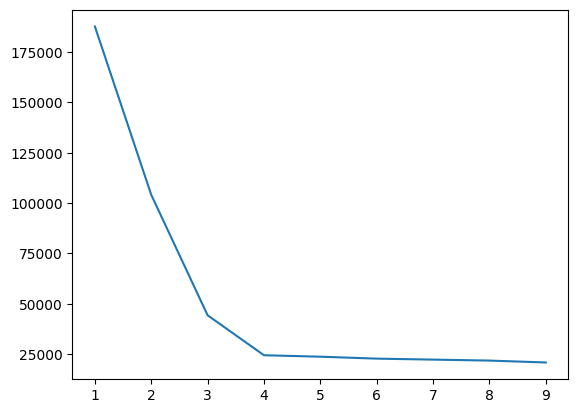

In [99]:
# Plot sse versus k

sns.lineplot(x=k_values, y=sse)


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?

There seems to be 4 clusters in the data

# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


Import libs

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [117]:
url = "datasets/iris/iris.csv"

iris = pd.read_csv(url, header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Analyse which k value is the best

<Axes: >

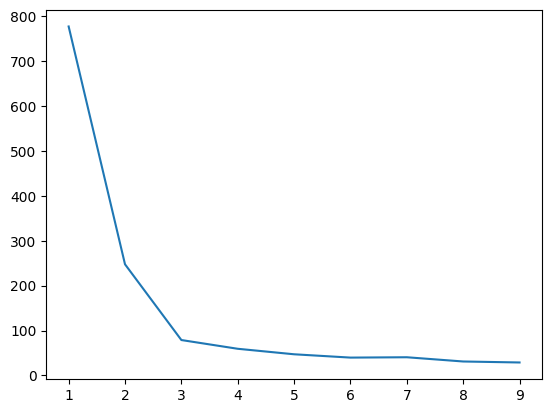

In [123]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k

k_values = range(1, 10)

# Remove the species column
iris_analysis = iris.drop(axis=1, columns=['species'])

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(iris_analysis)
    # Append the SSE to the list
    sse.append(km.inertia_)

sns.lineplot(x=k_values, y=sse)

We can see the best k value is 3

In [127]:
km = KMeans(n_clusters=3, n_init='auto')

iris["yestimated"] = km.fit_predict(iris_analysis)

print(iris.tail())

ranges = [(iris.sepal_length.min(), iris.sepal_length.max()),
(iris.sepal_width.min(), iris.sepal_width.max()),
(iris.petal_length.min(), iris.petal_length.max()),
(iris.petal_width.min(), iris.petal_width.max())]

print(ranges)

     sepal_length  sepal_width  petal_length  petal_width         species  \
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     yestimated  
145           2  
146           1  
147           2  
148           2  
149           1  
[(4.3, 7.9), (2.0, 4.4), (1.0, 6.9), (0.1, 2.5)]


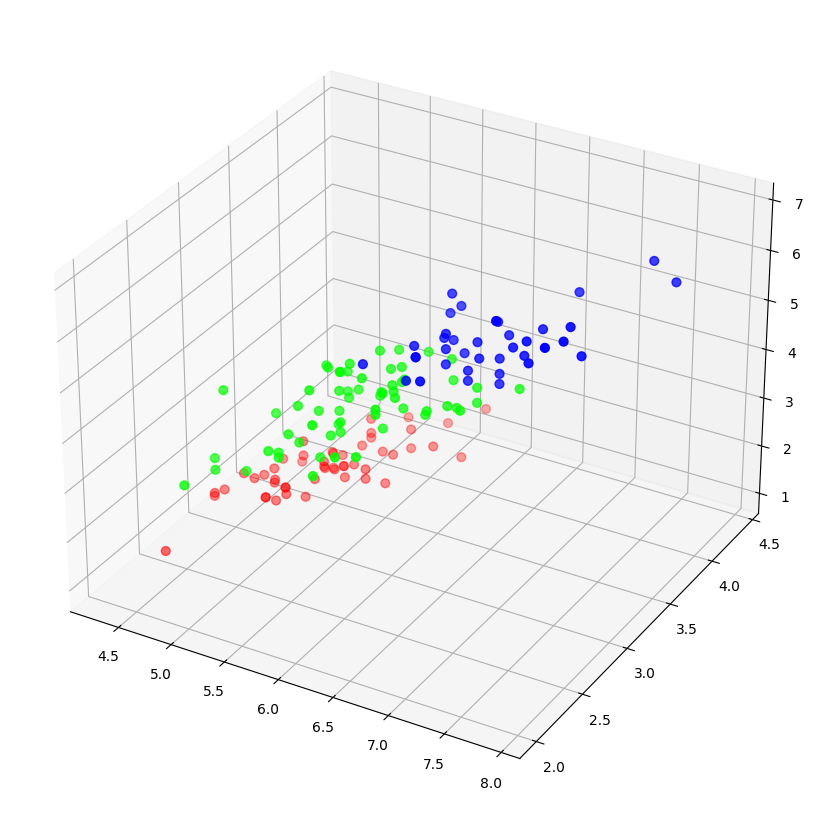

In [133]:
# x1, x2, x3
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Red, Green, Blue
color_map = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

sc = ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_length'], c=iris["yestimated"], s=40, cmap=color_map)

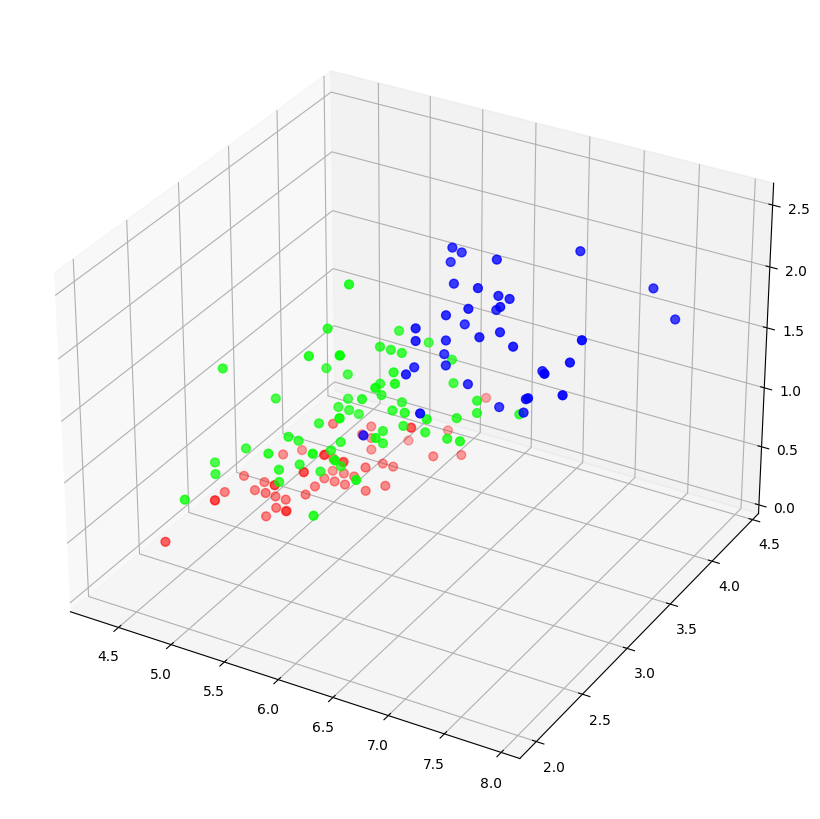

In [134]:
# x1, x2, x4
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(iris['sepal_length'], iris['sepal_width'], iris['petal_width'], c=iris["yestimated"], s=40, cmap=color_map)


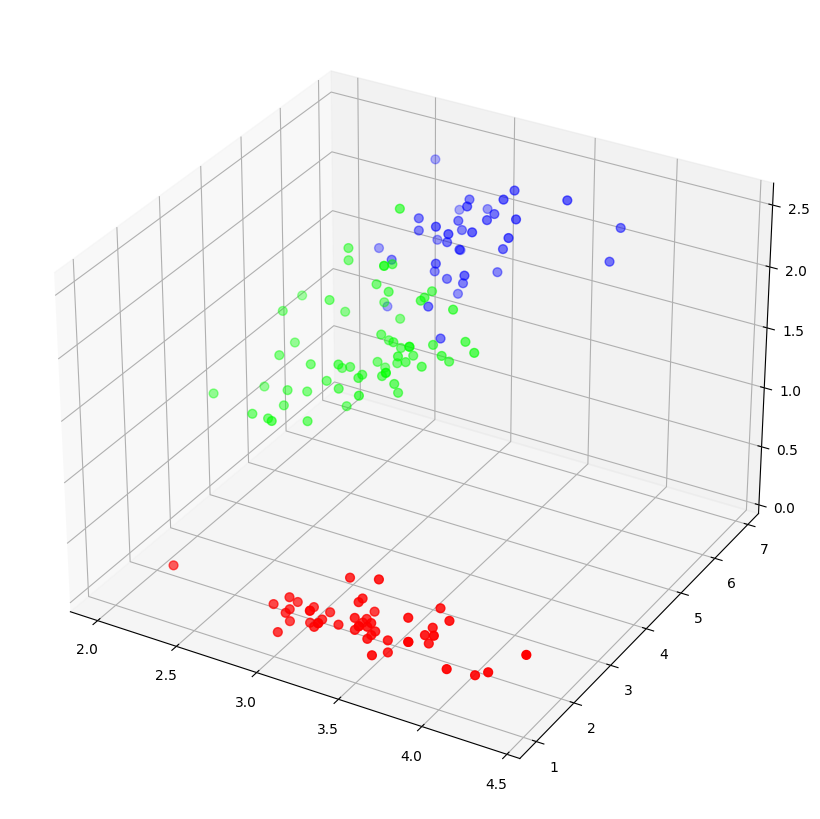

In [135]:
# x2, x3, x4
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(iris['sepal_width'], iris['petal_length'], iris['petal_width'], c=iris["yestimated"], s=40, cmap=color_map)


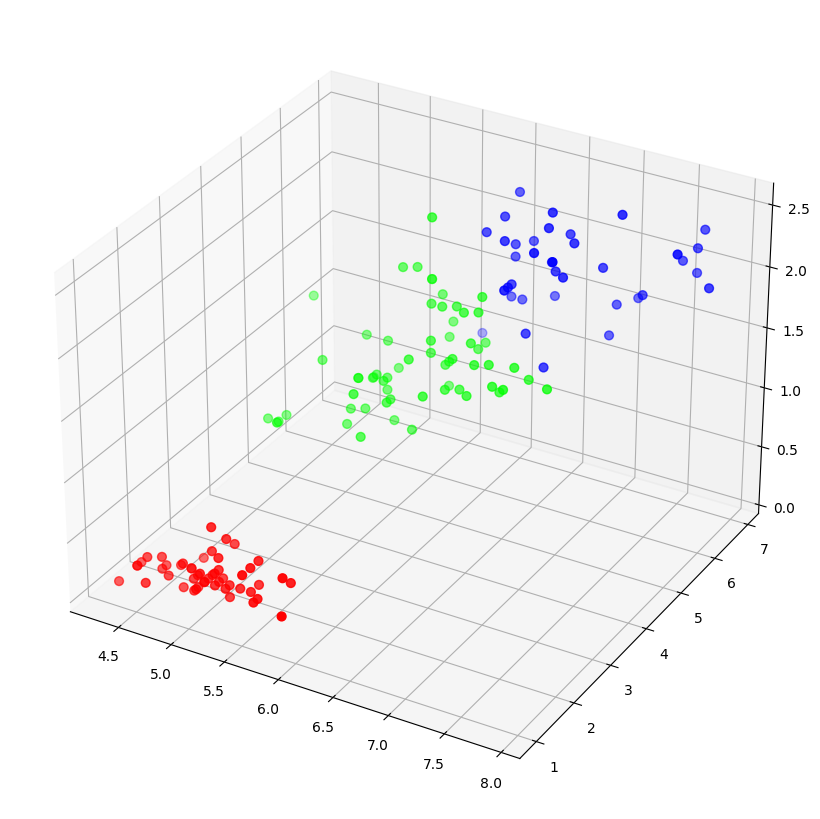

In [136]:
# x1, x3, x4
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(iris['sepal_length'], iris['petal_length'], iris['petal_width'], c=iris["yestimated"], s=40, cmap=color_map)

Now, let's analyse only petals

In [143]:
# Drop sepal length and width

iris_petals = iris.drop(axis=1, columns=['sepal_length', 'sepal_width', 'species', 'yestimated'])

iris_petals.head()



,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


<Axes: >

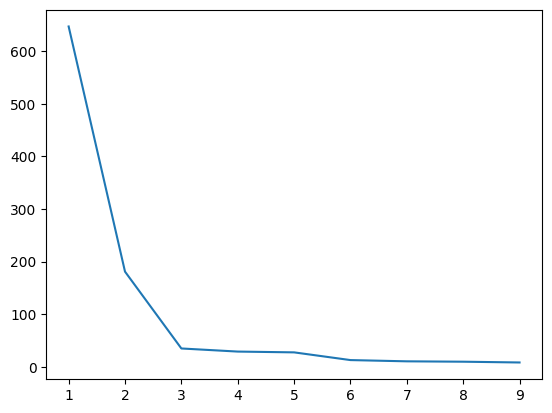

In [153]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k

k_values = range(1, 10)

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(iris_petals)
    # Append the SSE to the list
    sse.append(km.inertia_)

sns.lineplot(x=k_values, y=sse)

<Axes: xlabel='petal_length', ylabel='petal_width'>

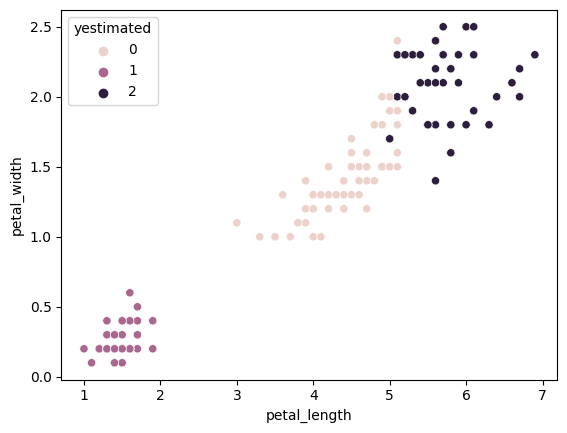

In [146]:
km = KMeans(n_clusters=3, n_init='auto')

iris_petals["yestimated"] = km.fit_predict(iris_analysis)

sns.scatterplot(x="petal_length", y="petal_width", data=iris_petals, hue="yestimated")

Now let's do the same but only with sepals

In [150]:
# Drop petal length and width

iris_sepal = iris.drop(axis=1, columns=['petal_length', 'petal_width', 'species', 'yestimated'])

iris_sepal.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

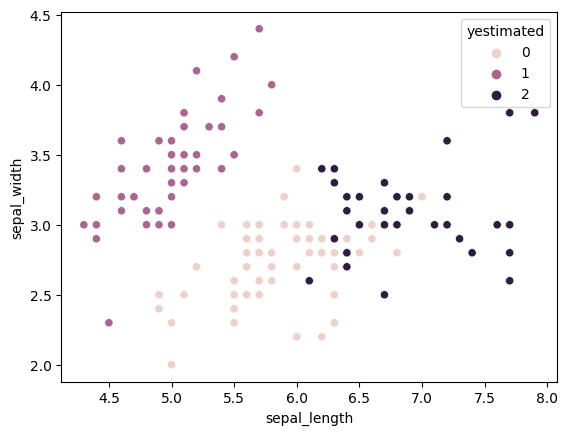

In [156]:
km = KMeans(n_clusters=3, n_init='auto')

iris_sepal["yestimated"] = km.fit_predict(iris_analysis)

sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_sepal, hue="yestimated")

Based on these findings, we can see that petals are the best features to use for clustering, since they provide the best grouping compared to sepals.